 1. Read and display the image.
 • Read the image using the Pillow library and display it.
 • You can also use matplotlib to display the image.

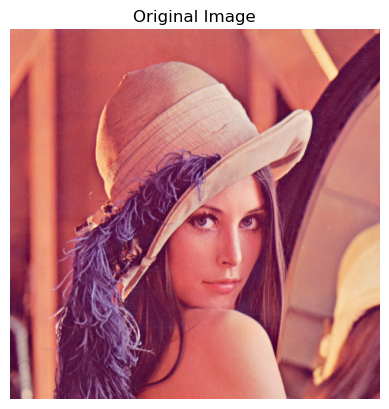

In [1]:
from PIL import Image
import matplotlib.pyplot as plt
image = Image.open("Lenna_(test_image).png")
plt.imshow(image)
plt.axis("off")
plt.title("Original Image")
plt.show()

Display only the top left corner of 100x100 pixels.
 • Extract the top-left corner of the image (100x100 pixels) and display it using NumPy and
 Array Indexing

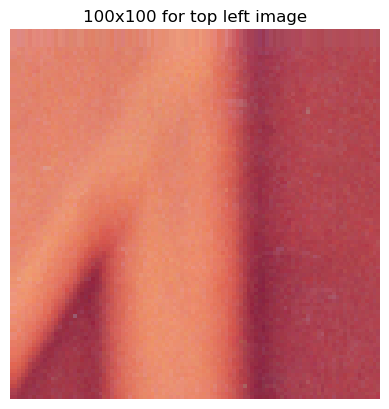

In [2]:
import numpy as np
image_array = np.array(image)
top_left = image_array[:100, :100]
plt.imshow(top_left)
plt.axis("off")
plt.title("100x100 for top left image")
plt.show()

Show the three color channels (R, G, B).
 • Separate the image into its three color channels (Red, Green, and Blue) and display them
 individually, labeling each channel as R, G, and B.{Using NumPy.}

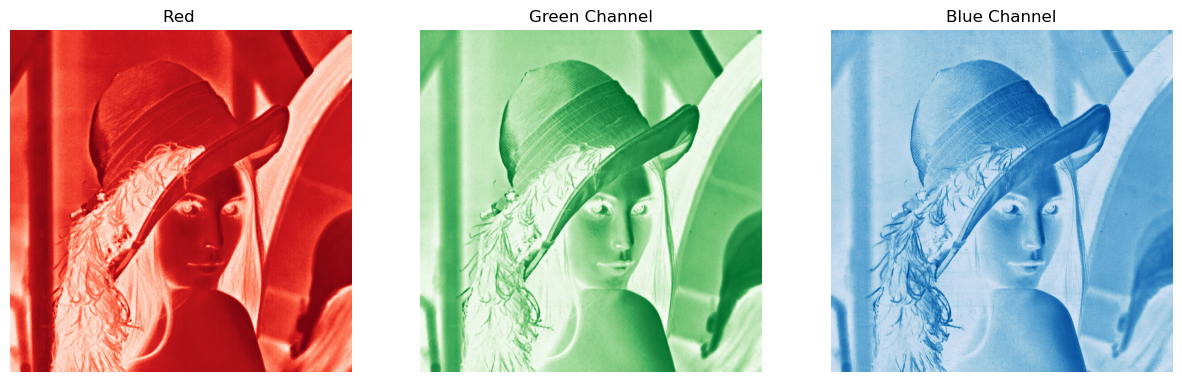

In [4]:
R = image_array[:, :, 0]
G = image_array[:, :, 1]
B = image_array[:, :, 2]
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs[0].imshow(R, cmap="Reds")
axs[0].set_title("Red ")
axs[1].imshow(G, cmap="Greens")
axs[1].set_title("Green Channel")
axs[2].imshow(B, cmap="Blues")
axs[2].set_title("Blue Channel")
for ax in axs:
    ax.axis("off")
plt.show()

 Load and display a grayscale image.
 • Load a grayscale image using the Pillow library.
 • Display the grayscale image using matplotlib.

In [ ]:
Modify the top 100 ×100 pixels to a value of 210 and display the resulting image:
 • Modify the pixel values of the top-left 100 × 100 region to have a value of 210 (which is a
 light gray color), and then display the modified image.

In [ ]:
mod_image = image_array.copy()
mod_image[:100, :100] = 210
plt.imshow(mod_image)
plt.axis("off")
plt.title("Modified Image set top right value to 210")
plt.show()

 2. Extract and display the middle section of the image (150 pixels).
 • Extract a 150 pixel section from the center of the image using NumPy array slicing.
 • Display this cropped image using matplotlib.

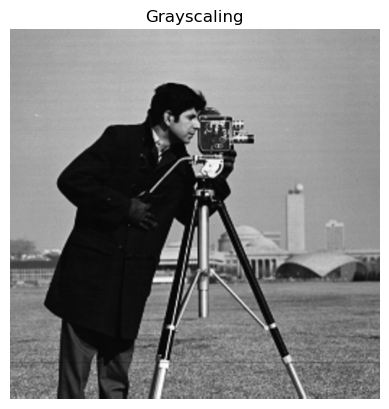

In [6]:
gray_image = Image.open("cameraman.png").convert("L")
plt.imshow(gray_image, cmap="gray")
plt.axis("off")
plt.title("Grayscaling")
plt.show()

 3. Apply a simple threshold to the image (e.g., set all pixel values below 100 to 0).
 • Apply a threshold to the grayscale image: set all pixel values below 100 to 0, and all values
 above 100 to 255 (creating a binary image).
 • Display the resulting binary image

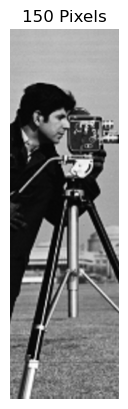

In [7]:
gray_array = np.array(gray_image)
center_x = gray_array.shape[1] // 2
cropped_section = gray_array[:, center_x-75:center_x+75]
plt.imshow(cropped_section, cmap="gray")
plt.axis("off")
plt.title("150 Pixels")
plt.show()

 3. Apply a simple threshold to the image (e.g., set all pixel values below 100 to 0).
 • Apply a threshold to the grayscale image: set all pixel values below 100 to 0, and all values
 above 100 to 255 (creating a binary image).
 • Display the resulting binary image.

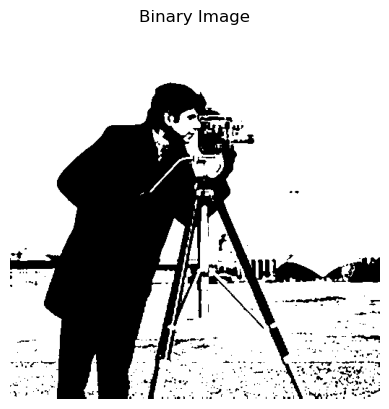

In [8]:
binary_image = np.where(gray_array < 100, 0, 255)
plt.imshow(binary_image, cmap="gray")
plt.axis("off")
plt.title("Binary Image")
plt.show()

 4. Rotate the image 90 degrees clockwise and display the result.
 • Rotatethe image by90degrees clockwise using the Pillow rotate method or by manipulating
 the image array.
 • Display the rotated image using matplotlib

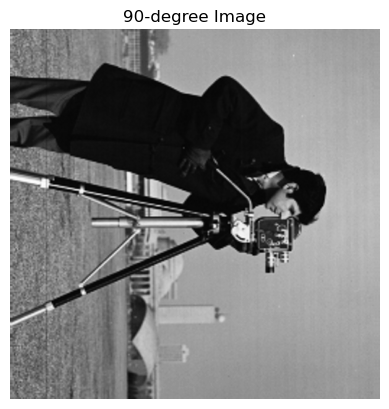

In [9]:
rotated_image = gray_image.rotate(-90)
plt.imshow(rotated_image, cmap="gray")
plt.axis("off")
plt.title("90-degree Image")
plt.show()

5. Convert the grayscale image to an RGB image.
 • Convert the grayscale image into an RGB image where the grayscale values are replicated
 across all three channels (R, G, and B).
 • Display the converted RGB image using matplotlib.

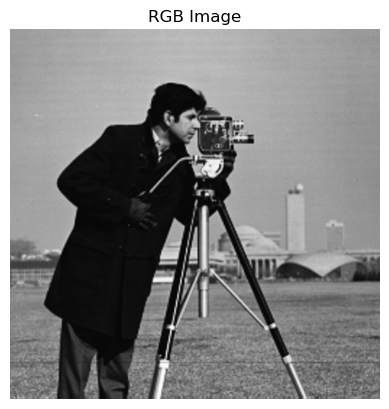

In [10]:
rgb_image = np.stack([gray_array]*3, axis=-1)
plt.imshow(rgb_image)
plt.axis("off")
plt.title("RGB Image")
plt.show()

3 Image Compression and Decompression using PCA.
 In this exercise, build a PCA from scratch using explained variance method for image compression task.
 You are expected to compute the necessary matrices from the scratch. Dataset: Use image of your
 choice.
 1. Load and Prepare Data:
 • Fetch an image of you choice.{If colour convert to grayscale}
 • Center the dataset- Standaridze the Data.
 • Calculate the covaraince matrix of the Standaridze data.
 2. Eigen Decomposition and Identifying Principal Components:
 • Compute Eigen Values and Eigen Vectors.
 • Sort the eigenvalues in descending order and choose the top k eigenvectors corresponding to
 the highest eigenvalues.
 • Identify the Principal Components with the help of cumulative Sum plot.
 3. Reconstruction and Experiment:
 • Reconstruction: Transform the original data by multiplying it with the selected eigenvec
tors(PCs) to obtain a lower-dimensional representation.
 • Experiments: Pick Four different combination of principal components with various ex
plained variance value and compare the result.
 • Display the Results and Evaluate

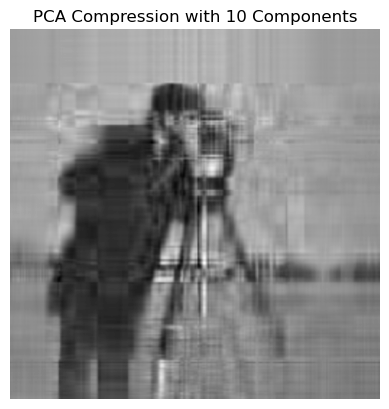

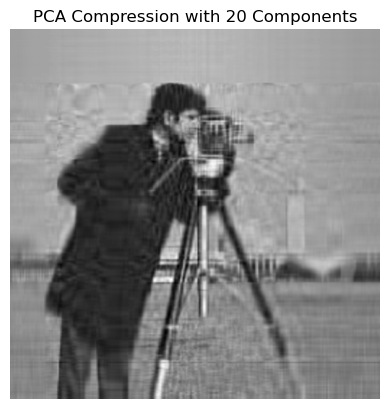

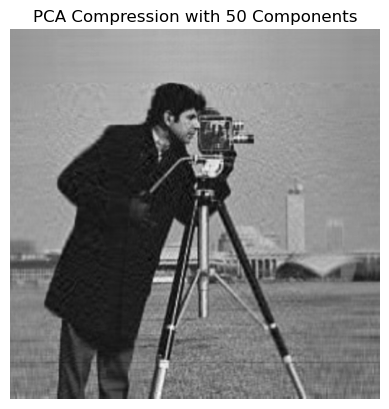

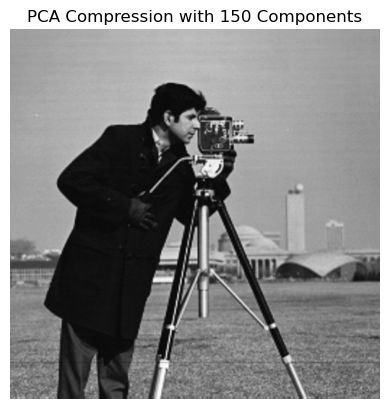

In [11]:
from sklearn.decomposition import PCA

img = np.array(gray_image)
mean = np.mean(img, axis=0)
std_data = img - mean
cov = np.cov(std_data.T)
eig_vals, eig_vecs = np.linalg.eig(cov)
sorted_idx = np.argsort(eig_vals)[::-1]
sorted_vecs = eig_vecs[:, sorted_idx]

for k in [10, 20, 50, 150]:
    top_vecs = sorted_vecs[:, :k]
    transformed = np.dot(std_data, top_vecs)
    reconstructed = np.dot(transformed, top_vecs.T) + mean
    plt.imshow(reconstructed, cmap="gray")
    plt.title(f"PCA Compression with {k} Components")
    plt.axis("off")
    plt.show()